✅ Dataset Loaded
Shape: (7043, 38)
Columns: ['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'] 

Data Types:
 Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                    

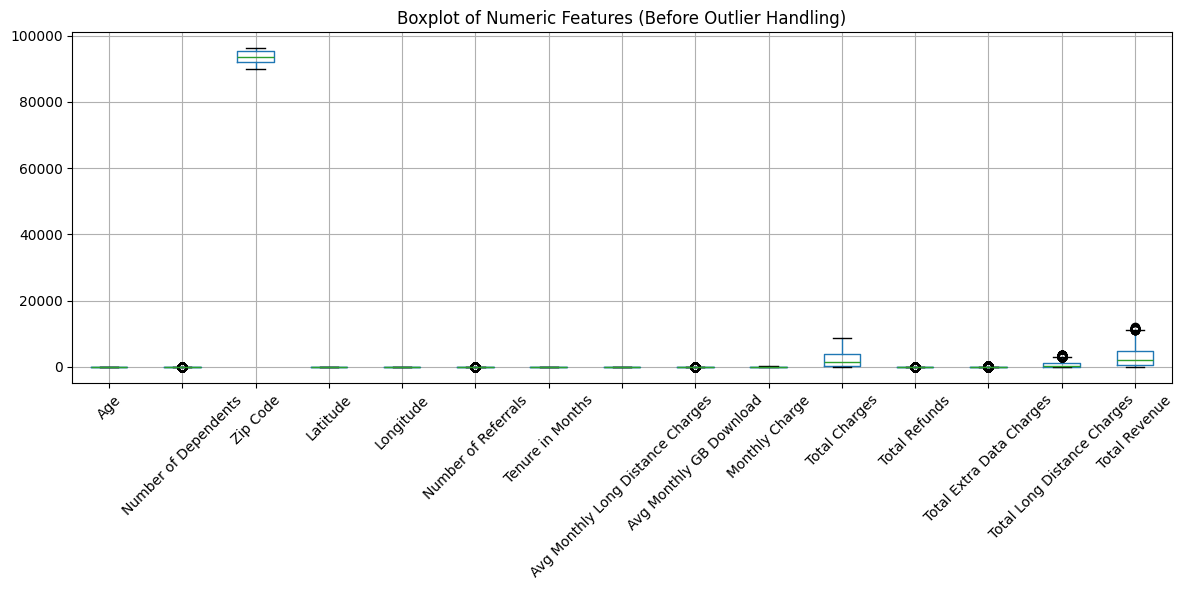

✅ Data Prepared for Modeling
X_train: (5634, 35)
y_train: (5634,)
X_test: (1409, 35)
y_test: (1409,)


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 2: Load dataset
df = pd.read_csv("telecom_customer_churn.csv")
print("✅ Dataset Loaded")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")
print("Data Types:\n", df.dtypes, "\n")
print("Missing values (first 10 columns):\n", df.isna().sum().head(10), "\n")
print("Unique values (first 10 columns):\n", df.nunique().head(10), "\n")

# Step 3: Separate numeric and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Step 4: Handle missing values
df[num_cols] = df[num_cols].apply(lambda s: s.fillna(s.median()))
df[cat_cols] = df[cat_cols].apply(lambda s: s.fillna(s.mode().iloc[0]) if not s.mode().empty else s.fillna('Unknown'))

# Step 5: Remove duplicates
print("Length before duplicates:", len(df))
df = df.drop_duplicates().reset_index(drop=True)
print("Length after duplicates:", len(df))

# Step 6: Clean categorical string columns
for c in df.select_dtypes('object'):
    df[c] = (df[c].astype(str).str.strip()
                    .str.replace(r'\s+', ' ', regex=True)
                    .str.replace('^yes$', 'Yes', case=False, regex=True)
                    .str.replace('^no$', 'No', case=False, regex=True))

# Step 7: Visualize numeric features for outliers
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title('Boxplot of Numeric Features (Before Outlier Handling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Handle outliers using IQR clipping
for c in num_cols:
    q1, q3 = df[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    df[c] = df[c].clip(lower, upper)

# Step 9: Encode categorical features
label_cols = ['Customer Status', 'Churn Category', 'Churn Reason', 'Payment Method']
for c in label_cols:
    if c in df.columns:
        le = LabelEncoder()
        df[c] = le.fit_transform(df[c])

# Step 10: Scale numeric features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 11: Prepare features (X) and target (y)
X = df.drop(columns=['Customer Status','Churn Category', 'Churn Reason'], errors='ignore')
y = df['Customer Status']

# Step 12: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 13: Check shapes
print("✅ Data Prepared for Modeling")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
